# Installing and Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [3]:
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [4]:
import os

In [5]:
DATASET_PATH = './Dataset'
print(list(os.listdir(f'{DATASET_PATH}/genres_original')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [6]:
CLASS_MAP = {class_name: i for i, class_name in enumerate(os.listdir(f'{DATASET_PATH}/genres_original'))}

# Preprocessing & Analysing Data

y -> sound (sequence of vibrations in varying pressure strengths)
sample rate (sr) -> number of samples of audio carried per second measured in Hz or kHz

## Loading one audio file

In [6]:
# loading one audio file to check for shape and sample rates

y,sr = librosa.load(f'{DATASET_PATH}/genres_original/reggae/reggae.00036.wav')

print('y: ',y,'\n')
print('y shape: ',y.shape,'\n')
print('Sample Rate (KHz): ',sr,'\n')

y:  [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape:  (661794,) 

Sample Rate (KHz):  22050 



In [7]:
# Length of Audio

print('Length of audio: ',y.shape[0]/sr, ' seconds')

Length of audio:  30.013333333333332  seconds


## Trim leading and trailing silence

In [8]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

In [9]:
print('shape of file and numpy array: ',audio_file.shape, audio_file)

shape of file and numpy array:  (661794,) [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388]


## 2D Representation of Sound Waves

Text(0.5, 1.0, 'Sound Wave in Reggae 36')

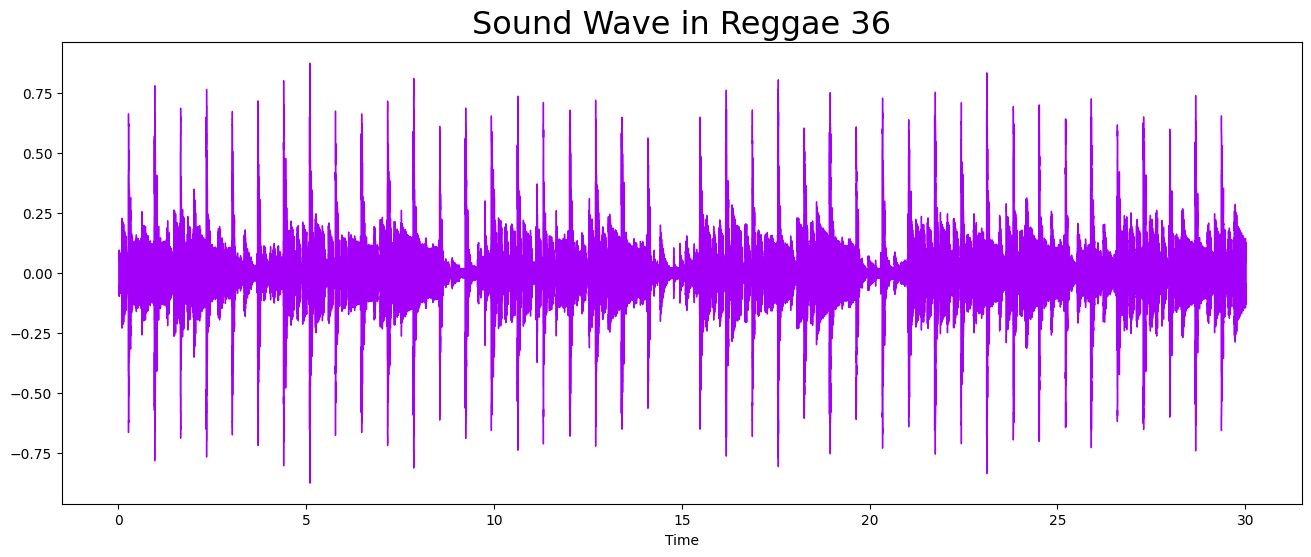

In [10]:
plt.figure(figsize=(16,6))
librosa.display.waveshow(y= audio_file,sr=sr,color="#A300F9")
plt.title("Sound Wave in Reggae 36",fontsize=23)

## Fourier Transform

the fourier function gets a signal in the time domain as input, and ouputs its decomoposition into frequencies
transforms both y axis (frequency) to log scale and the "color" axis (amplitude) to decibals

In [11]:
# default FFT window size
n_fft=2048 # fft window size
hop_length=512 # number audio of frames between STFT columns

# STFT
D=np.abs(librosa.stft(audio_file,n_fft=n_fft,hop_length=hop_length))
print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


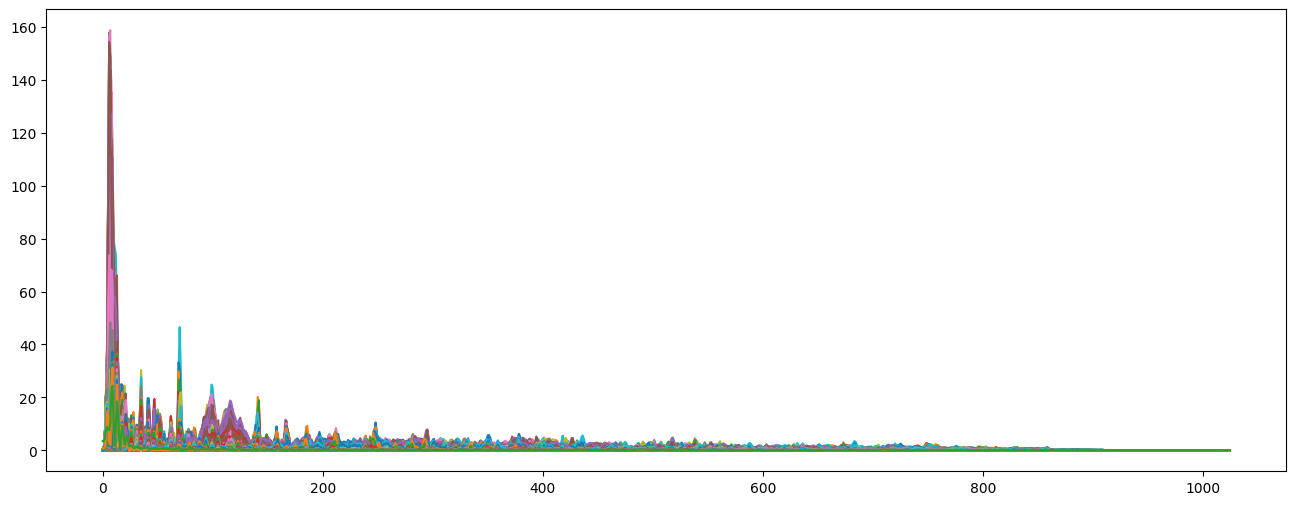

In [13]:
plt.figure(figsize=(16,6))
plt.plot(D);

## Visualizing Spectrogram

spectrogram is a visual representation of a spectrum of frequencies of a signal as it varies with time. When applied to an audio signal they are known as sonograpgs,voiceprints,voicegram (source: wikipedia)
here we convert frequency axis to logarithmic one

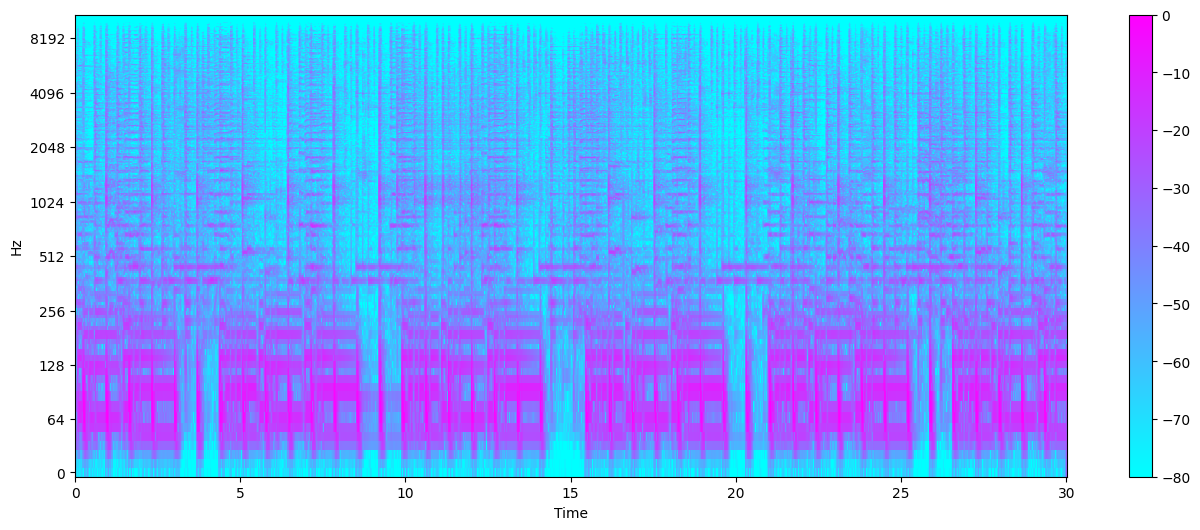

In [14]:
# Converting an aplitude spectrogram to a Decibals-Scaled Spectrogram
DB=librosa.amplitude_to_db(D,ref=np.max)

# Creating the spectrogram
plt.figure(figsize=(16,6))
librosa.display.specshow(DB,sr=sr,hop_length=hop_length,x_axis='time',y_axis='log',cmap='cool')
plt.colorbar();

## Mel Spectrogram

Mathematically, mel spectrogram is the result of the non linear transformations of the frequency scale. 
Its just like noraml spectrogram but with Mel Scale on the y axis

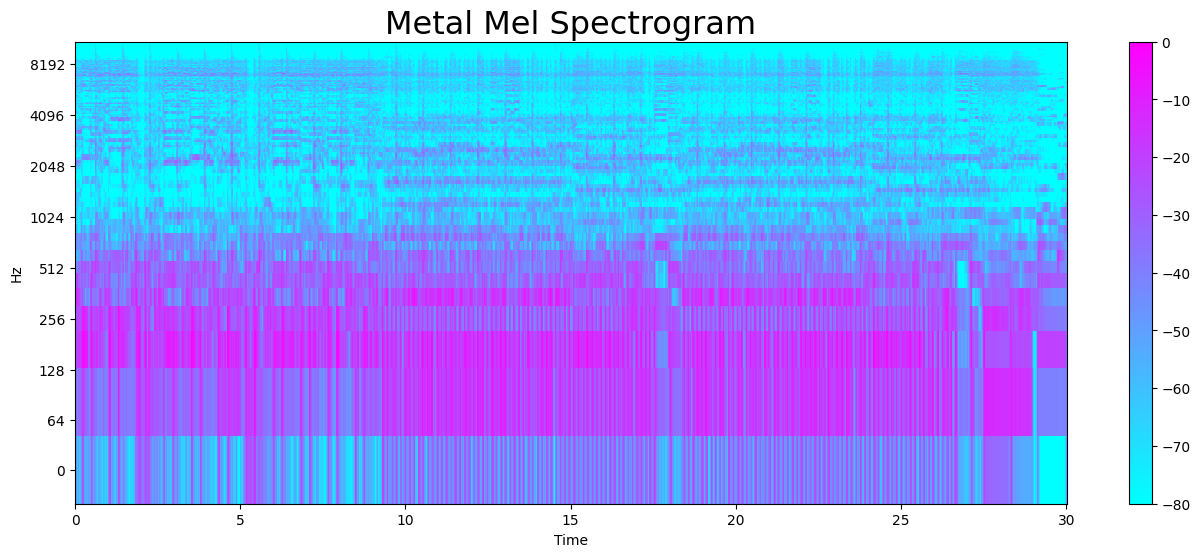

In [17]:
y, sr= librosa.load(f'{DATASET_PATH}/genres_original/metal/metal.00023.wav')
y, _ =librosa.effects.trim(y)

S=librosa.feature.melspectrogram(y=y,sr=sr)
S_DB=librosa.amplitude_to_db(S,ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB,sr=sr,hop_length=hop_length,x_axis='time',y_axis='log',cmap='cool')
plt.colorbar();
plt.title("Metal Mel Spectrogram",fontsize=23);

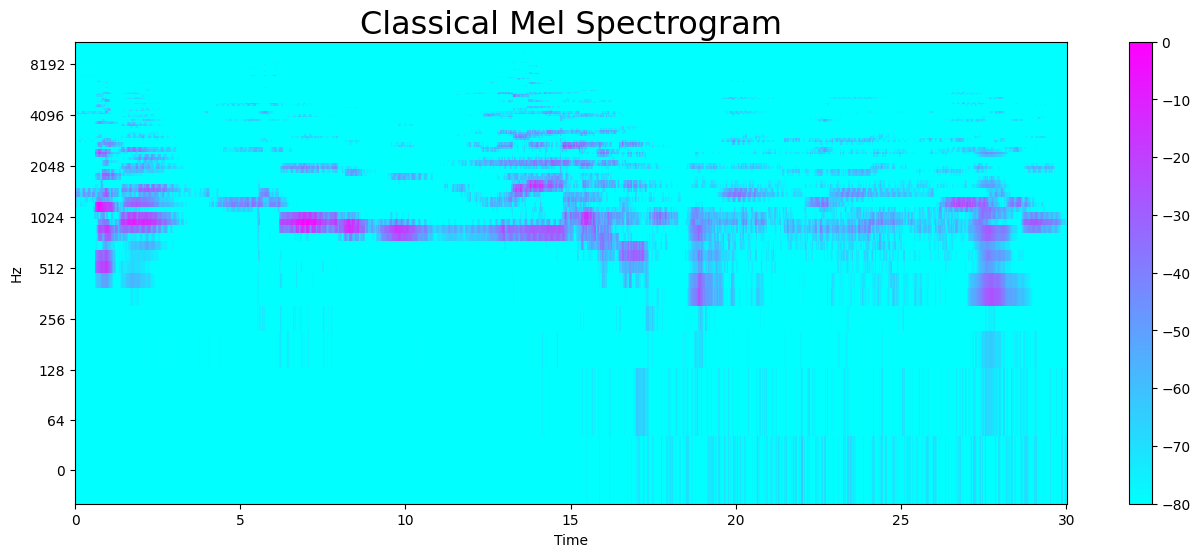

In [21]:
y, sr = librosa.load(f'{DATASET_PATH}/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);


## Audio Features

### Zero Crossing Rate

the rate at which signal changes from +ve to -ve or vice versa

In [22]:
zero_crossing=librosa.zero_crossings(audio_file,pad=False)
print(sum(zero_crossing))

39232


### Harmonics and Perceptual

Harmonics are characteristics that human ears can't distinguish (rep. the sound color)

Perceptrual understanding shock wave represents the sound rythm and emotion

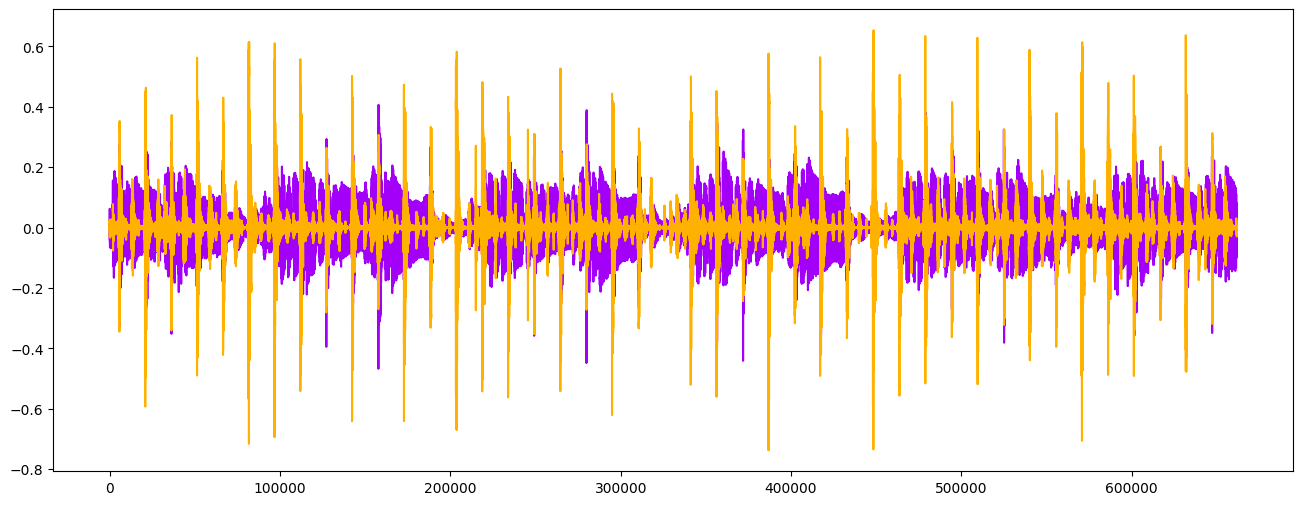

In [23]:
y_harm,y_perc=librosa.effects.hpss(audio_file)

plt.figure(figsize=(16,6))
plt.plot(y_harm,color="#A300F9")
plt.plot(y_perc,color="#FFB100")

### Tempo Beats Per Minute

dynamic programming beat tracker

In [25]:
tempo, _ =librosa.beat.beat_track(y=y,sr=sr)
print(tempo)

107.666015625


### Spectral Centroid

indicates the location for the "center of mass" of the sound and is calculated as the weighted mean of the frequencies present in the sound

In [31]:
# calculating the spectral centroid
spectral_centroids=librosa.feature.spectral_centroid(y=audio_file,sr=sr)[0]

# Shape is a vector
print('Centroids: ',spectral_centroids,'\n')
print('Shape of Spectal Centroid: ',spectral_centroids.shape,'\n')

# computing time variable for visualization
frames=range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t=librosa.frames_to_time(frames=frames)

print('frames: ',frames,'\n')
print('t: ',t)

Centroids:  [1758.29476821 1946.74243805 2038.81133429 ...  766.50415702 1041.07728753
 1391.05146262] 

Shape of Spectal Centroid:  (1293,) 

frames:  range(0, 1293) 

t:  [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


In [42]:
# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

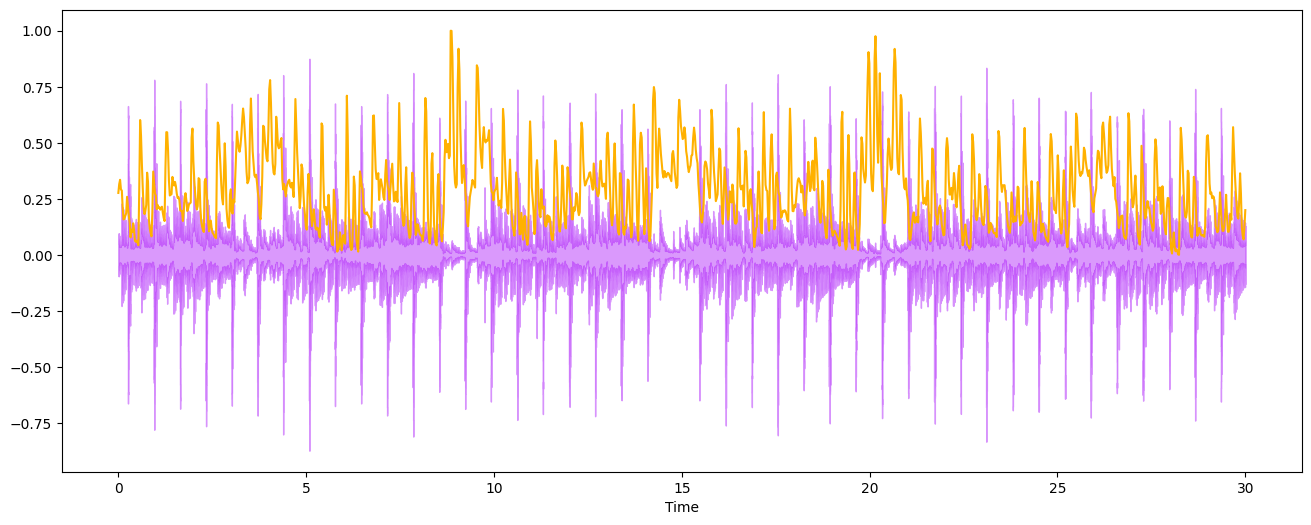

In [44]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

### Spectral Rolloff

measure of shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, eg 70%, lies

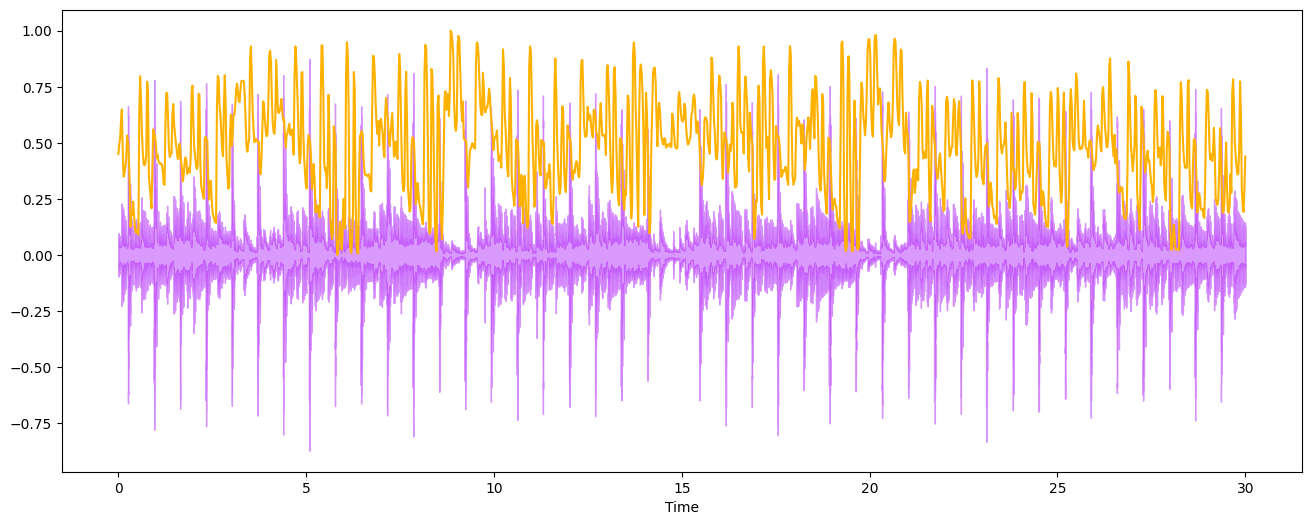

In [47]:
spectral_rolloff=librosa.feature.spectral_rolloff(y=audio_file,sr=sr)[0]

plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

### Mel Frequency Cepstral Coefficients

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfcc shape: (20, 1293)
Mean: -8.1132384e-10 

Var: 1.0000001


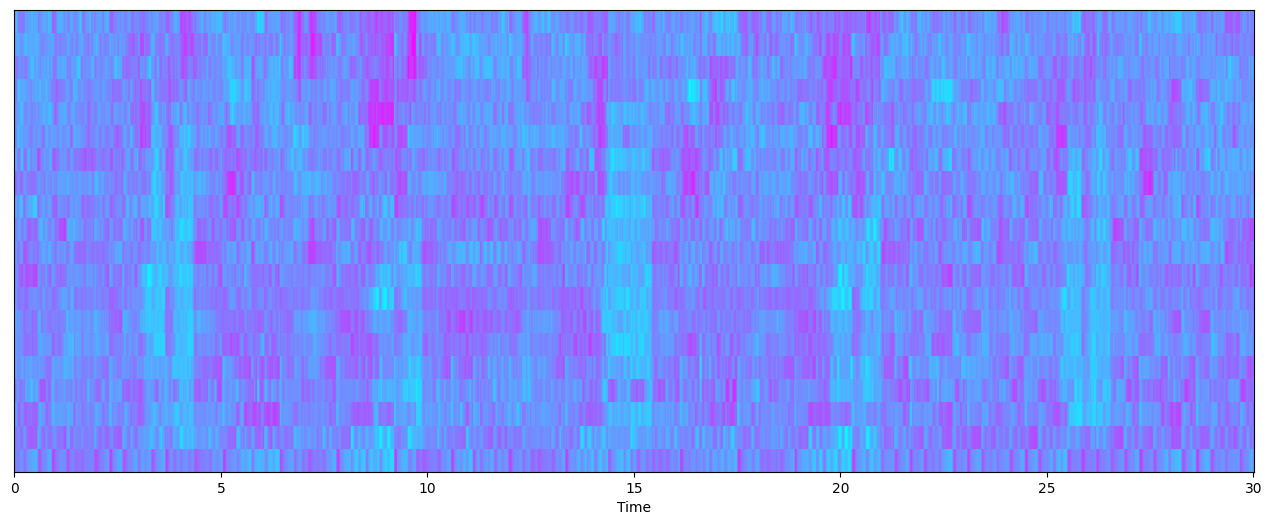

In [50]:
mfccs=librosa.feature.mfcc(y=audio_file,sr=sr)
print('mfcc shape:',mfccs.shape)

# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

### Chroma Frequencies

Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Chromogram shape:  (12, 133)


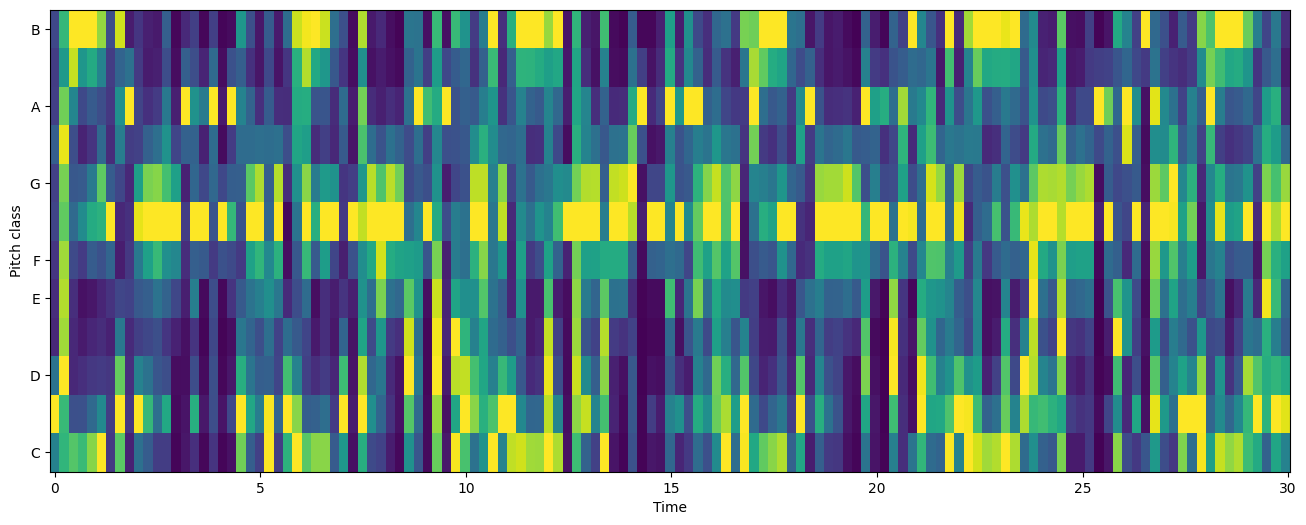

In [58]:
# Increase or decrease hop_length to change how granularity of data
hop_length = 5000

# chromogram
chromagram=librosa.feature.chroma_stft(y=audio_file,sr=sr,hop_length=hop_length)
print('Chromogram shape: ',chromagram.shape)


plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='viridis');

## EDA (Exploratory Data Analysis)

EDA is going to be performed on the features_30_sec.csv. This file contains the mean and variance for each audio file of the features analysed above.

So, the table has a final of 1000 rows (10 genrex x 100 audio files) and 60 features (dimensionalities).

In [60]:
data = pd.read_csv(f'{DATASET_PATH}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### Correlation Heatmap for feature means

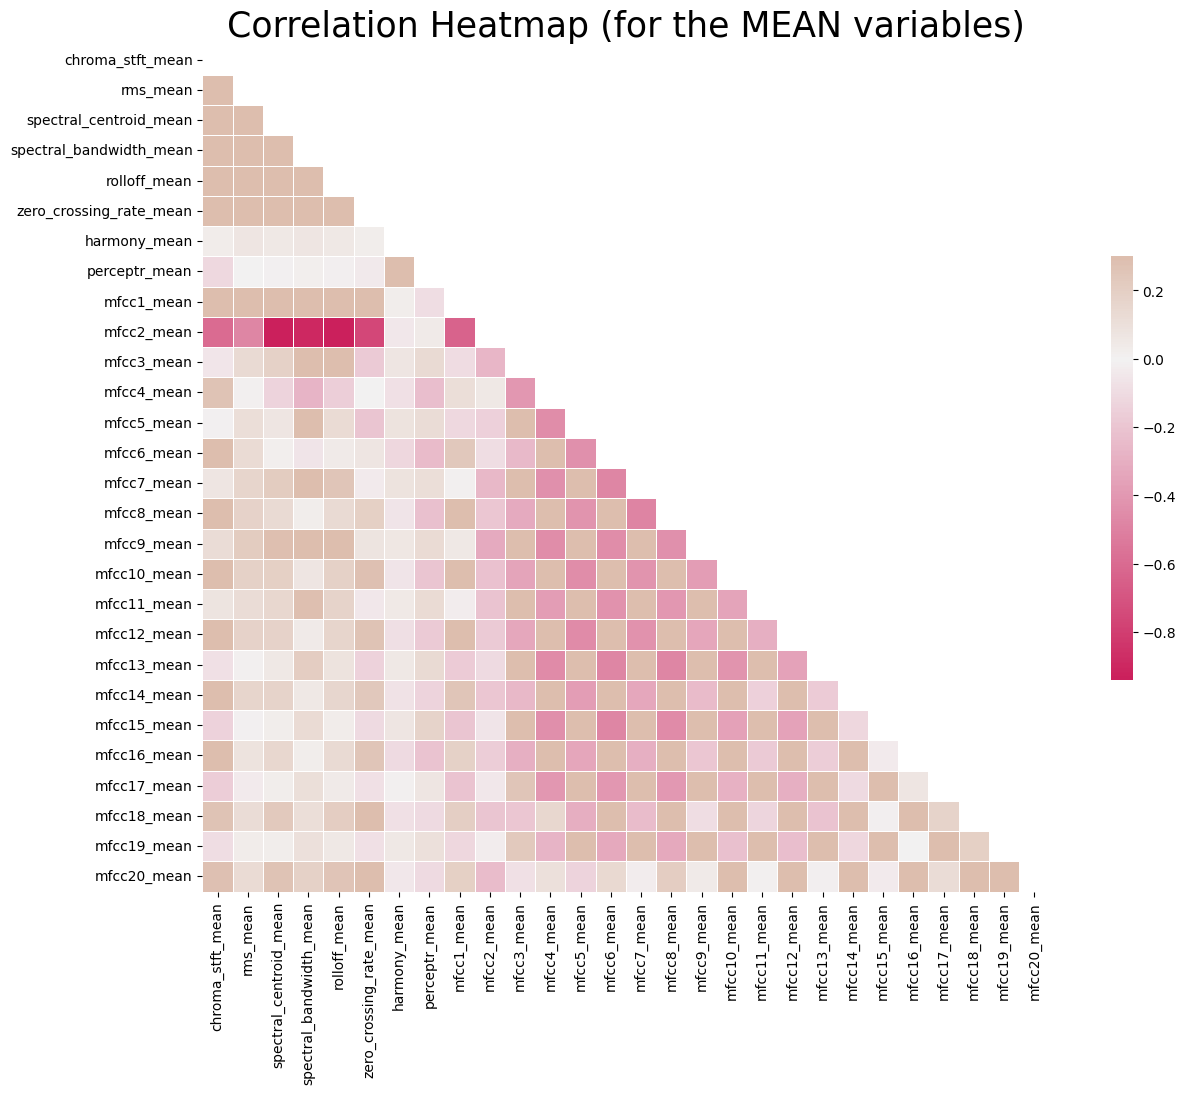

In [62]:
# computing the correlation matrix
spike_cols=[col for col in data.columns if 'mean' in col]
corr=data[spike_cols].corr()

# generating mask for upper triangle
mask= np.triu(np.ones_like(corr,dtype=np.bool_))

# set up the matplotlib figure
f,ax=plt.subplots(figsize=(16,11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

### Box Plot for Genres Distribution

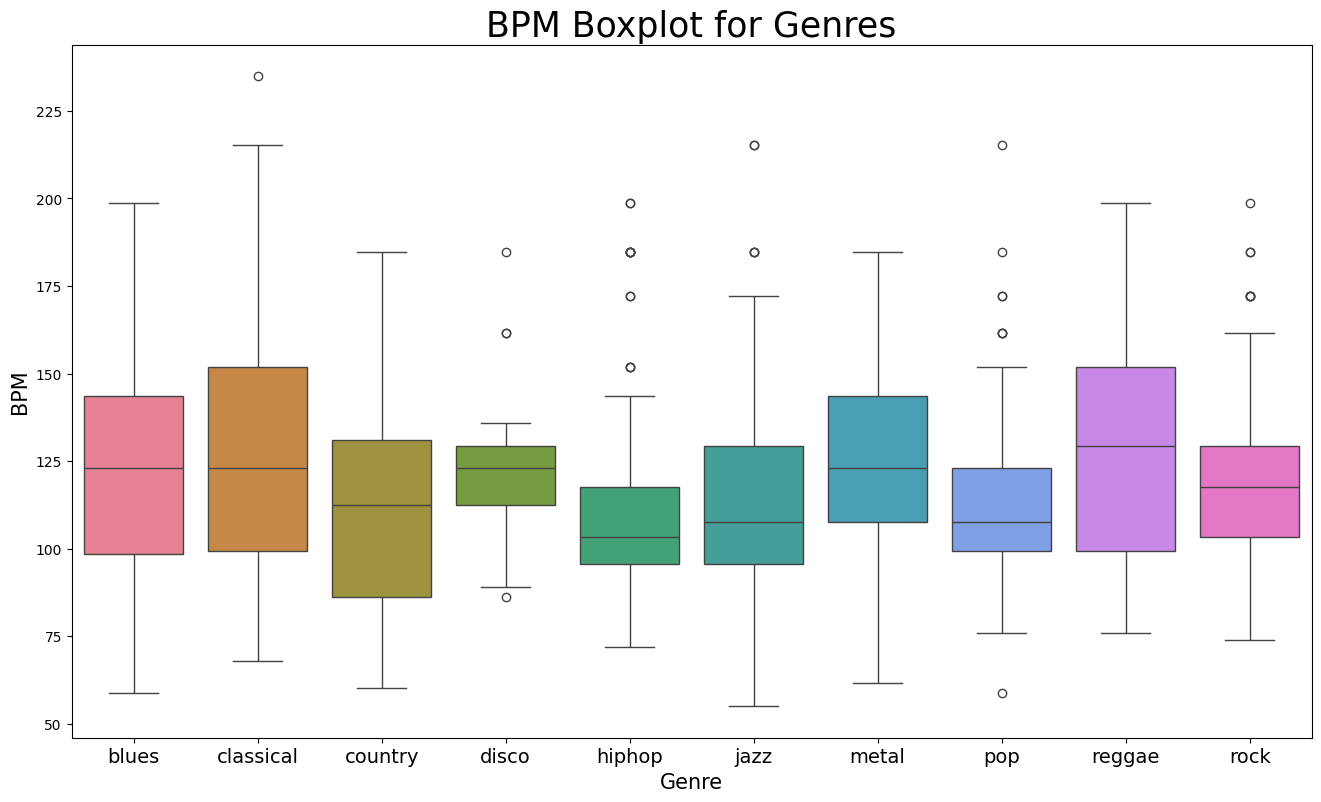

In [63]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

### Principal Component Analysis - to visualize possible groups of genres

1. Normalization
2. PCA
3. The Scatter Plot

In [68]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [66]:
data = data.iloc[:,1:]
X=data.iloc[:,data.columns!='label']
y=data['label']

In [67]:
### Normalizing X ###
cols=X.columns
min_max_scaler=preprocessing.MinMaxScaler()
np_scaled=min_max_scaler.fit_transform(X)
X=pd.DataFrame(np_scaled,columns=cols)

In [69]:
### PCA 2 Components ###
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(X)
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1', 'principal component 2'])

In [70]:
# concatenate with target label
finalDf=pd.concat([principalDf,y],axis=1)
pca.explained_variance_ratio_

array([0.24644968, 0.22028192])

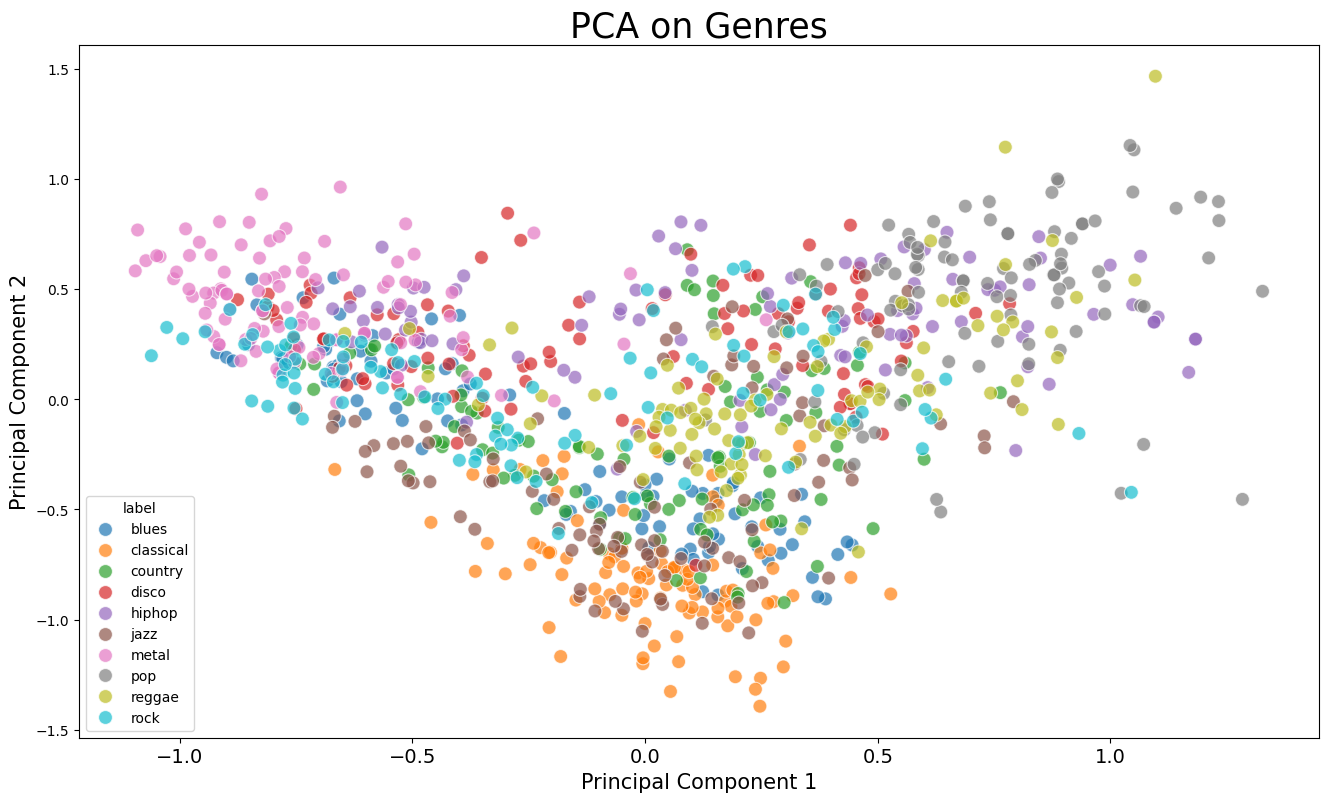

In [71]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# Analyzing Machine Learning Classification Models

Using the features_3_sec.csv file, we can try to build a classifier that accurately predicts for any new audio file input it's genre.

## Importing Libraries

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

## Importing Dataset

In [30]:
import pandas as pd

In [31]:
data = pd.read_csv(f'{DATASET_PATH}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [32]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

## Preprocessing Dataset

In [33]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X) 
X = pd.DataFrame(np_scaled, columns = cols)

In [34]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## Splitting the dataset

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Predefined function to assess the accuracy

In [12]:
def model_assess(model, title="Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    
    # # Plot confusion matrix as heatmap
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix - {title}')
    # plt.xlabel('Predicted Label')
    # plt.ylabel('True Label')
    # plt.show()
    
    # Print accuracy
    accuracy = accuracy_score(y_test, preds)
    print('Accuracy', title, ':', round(accuracy, 5), '\n')

In [33]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decision trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")


Accuracy Naive Bayes : 0.51952 

Accuracy Stochastic Gradient Descent : 0.65532 

Accuracy KNN : 0.80581 

Accuracy Decision trees : 0.64064 

Accuracy Random Forest : 0.81415 

Accuracy Support Vector Machine : 0.75409 

Accuracy Logistic Regression : 0.6977 

Accuracy Neural Nets : 0.68268 

Accuracy Cross Gradient Booster : 0.90123 

Accuracy Cross Gradient Booster (Random Forest) : 0.74741 



XGBoost is the winner - 90% accuracy
create the final model
compute confusion matrix
Compute Feature Importance

## Training the final Model

Accuracy : 0.90224 



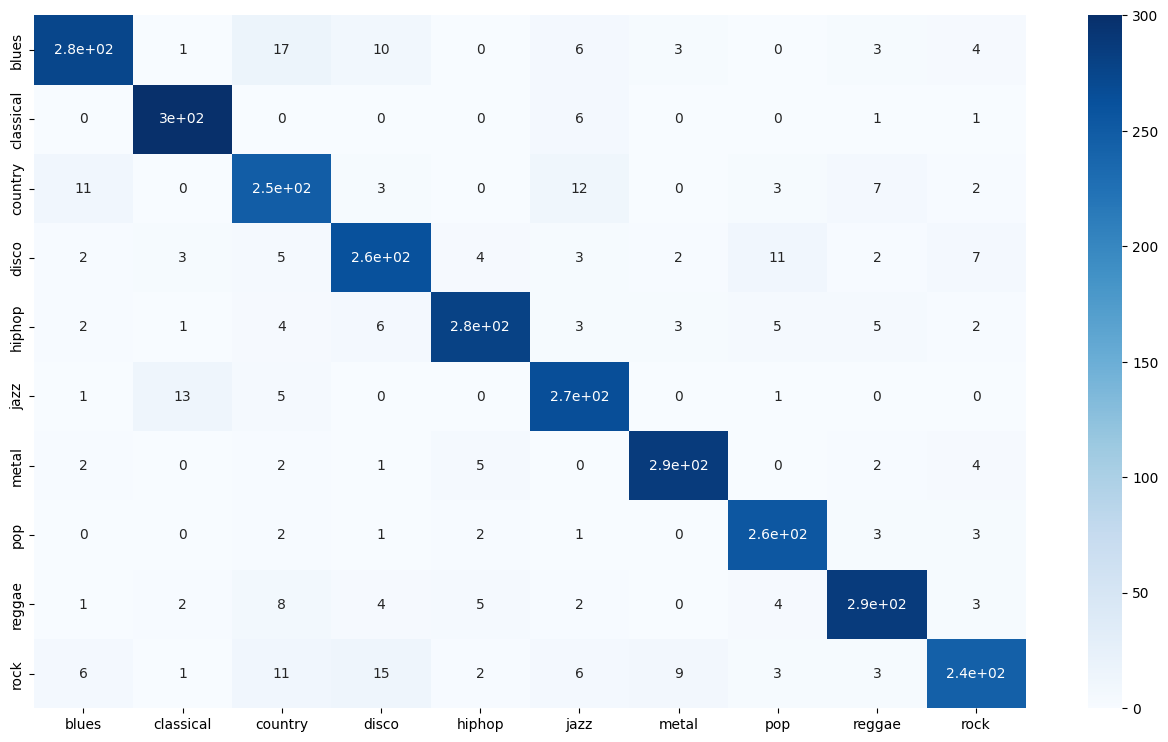

In [15]:
# Final model
xgb = XGBClassifier(n_estimators=10000, learning_rate=0.1)
xgb.fit(X_train, y_train)


preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

In [16]:
import pickle

# Save the model to a file
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

In [17]:
# Load the model from the file
with open('xgboost_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

## Training Using ANN to train for getting more accuracy

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization, GlobalAveragePooling1D

In [67]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [68]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [69]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [70]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 56, 64)            256       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 28, 64)           0         
 1D)                                                             
                                                                 
 conv1d_18 (Conv1D)          (None, 26, 128)           24704     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 13, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 11, 256)           98560     
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 5, 256)          

In [71]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
88/88 [==============================] - 1s 9ms/step - loss: 2.2135 - accuracy: 0.1793 - val_loss: 1.8227 - val_accuracy: 0.3331
Epoch 2/100
88/88 [==============================] - 0s 5ms/step - loss: 1.7881 - accuracy: 0.3348 - val_loss: 1.5595 - val_accuracy: 0.4217
Epoch 3/100
88/88 [==============================] - 0s 5ms/step - loss: 1.6023 - accuracy: 0.4063 - val_loss: 1.5128 - val_accuracy: 0.4346
Epoch 4/100
88/88 [==============================] - 0s 5ms/step - loss: 1.4847 - accuracy: 0.4564 - val_loss: 1.3127 - val_accuracy: 0.5147
Epoch 5/100
88/88 [==============================] - 0s 5ms/step - loss: 1.3721 - accuracy: 0.4973 - val_loss: 1.2053 - val_accuracy: 0.5575
Epoch 6/100
88/88 [==============================] - 0s 5ms/step - loss: 1.2948 - accuracy: 0.5220 - val_loss: 1.1486 - val_accuracy: 0.6019
Epoch 7/100
88/88 [==============================] - 0s 5ms/step - loss: 1.2294 - accuracy: 0.5449 - val_loss: 1.1358 - val_accuracy: 0.6047
Epoch 8/100
8

In [72]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

94/94 [==============================] - 0s 4ms/step - loss: 0.6224 - accuracy: 0.8772
Test Accuracy: 0.8772105574607849


It Failed to give any better results, so using the previous model only for the reccomendation system